Missing Values:
S/N             0
Program         0
Reported        0
Registered      0
% Conversion    0
dtype: int64

Summary Statistics:
             S/N    Reported  Registered
count  46.000000   46.000000   46.000000
mean   23.500000  149.739130  140.956522
std    13.422618  161.786751  152.553227
min     1.000000    1.000000    1.000000
25%    12.250000   27.750000   26.000000
50%    23.500000   96.500000   90.500000
75%    34.750000  215.250000  204.250000
max    46.000000  614.000000  587.000000

Top 5 programs by % Conversion:
   Program  % Conversion
0     DBAM         100.0
15     BAS         100.0
23     DIC         100.0
29     DCP         100.0
32     DDA         100.0

Bottom 5 programs by % Conversion:
   Program  % Conversion
1      MBA         80.95
41     DPM         86.67
44    DFBM         88.24
45    DECE         89.47
9      BES         89.93


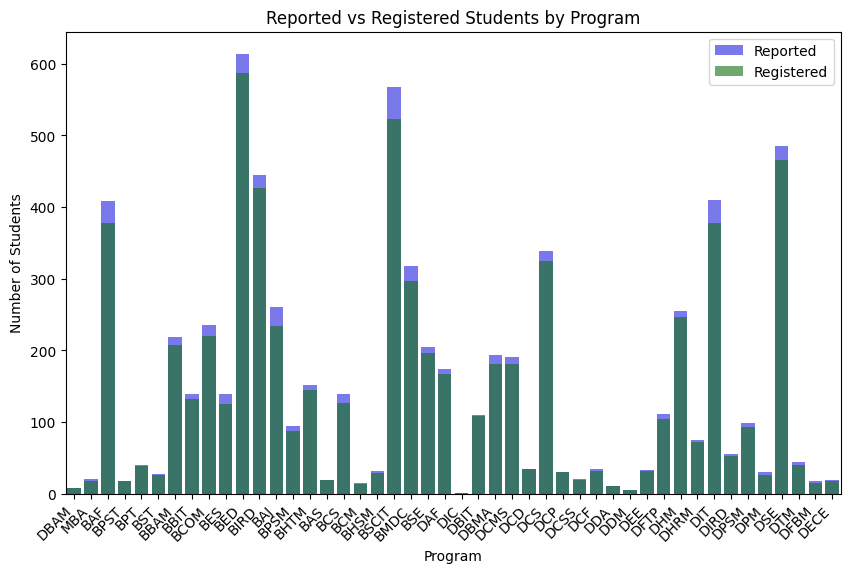

<ipython-input-15-6b649d8a0d8c>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Program', y='% Conversion', data=df, palette='coolwarm')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with

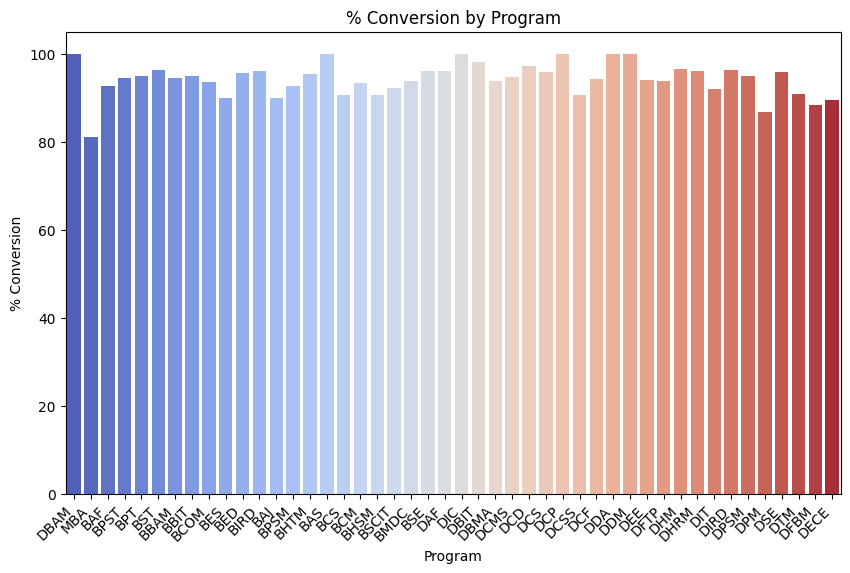


Correlation between Reported and Registered:
            Reported  Registered
Reported    1.000000    0.999618
Registered  0.999618    1.000000


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('admissions_data.csv')

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Ensure % Conversion is numeric
if df['% Conversion'].dtype == 'object':
    # Remove '%' sign and convert to float
    df['% Conversion'] = df['% Conversion'].str.replace('%', '').astype(float)

# Now you can safely use nlargest
top_programs = df.nlargest(5, '% Conversion')
print("\nTop 5 programs by % Conversion:")
print(top_programs[['Program', '% Conversion']])

bottom_programs = df.nsmallest(5, '% Conversion')
print("\nBottom 5 programs by % Conversion:")
print(bottom_programs[['Program', '% Conversion']])

# Bar plot for Reported vs Registered
plt.figure(figsize=(10, 6))
sns.barplot(x='Program', y='Reported', data=df, color='blue', label='Reported', alpha=0.6)
sns.barplot(x='Program', y='Registered', data=df, color='green', label='Registered', alpha=0.6)
plt.title('Reported vs Registered Students by Program')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Students')
plt.legend()
plt.show()

# % Conversion plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Program', y='% Conversion', data=df, palette='coolwarm')
plt.title('% Conversion by Program')
plt.xticks(rotation=45, ha='right')
plt.ylabel('% Conversion')
plt.show()

# Correlation between Reported and Registered
correlation = df[['Reported', 'Registered']].corr()
print("\nCorrelation between Reported and Registered:")
print(correlation)